In [14]:
import wandb
import os
os.environ["WANDB_API_KEY"] = "8877a09c505001125bdfe3f5abe3e9b98c673875"
import pandas as pd

In [30]:
api = wandb.Api()
run = api.run("lukebailey/transfer_to_continual_learning/5ixpqy0j")

In [53]:
run_paths = [
    "lukebailey/transfer_to_continual_learning/5ixpqy0j",
    "lukebailey/transfer_to_continual_learning/o08f4qik",
    "lukebailey/transfer_to_continual_learning/cpa2n5w9",
    "lukebailey/transfer_to_continual_learning/01q9m6f4",
    "lukebailey/transfer_to_continual_learning/4bpqvx07",
    "lukebailey/transfer_to_continual_learning/gnr0d4xu",
    "lukebailey/transfer_to_continual_learning/0x5zayn4"
]

In [51]:
def get_run_table(run_path):
    run = api.run(run_path)
    artifact = run.logged_artifacts(per_page=1)[0]
    
    arch = run.config["model"]["params"]
    arch = f"{arch['l1_out_channels']}_{arch['l2_out_channels']}_{arch['l3_out_channels']}_{arch['l4_out_channels']}"

    # Download the artifact
    artifact_dir = artifact.download()
    # Access the table from the downloaded artifact
    table = artifact.get("Metric Table")
    df = pd.DataFrame(data=table.data, columns=table.columns)
    return arch, df


In [55]:
data = []
for run_path in run_paths:
    arch, df = get_run_table(run_path)
    data.append([arch, df])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


In [58]:
import matplotlib.pyplot as plt


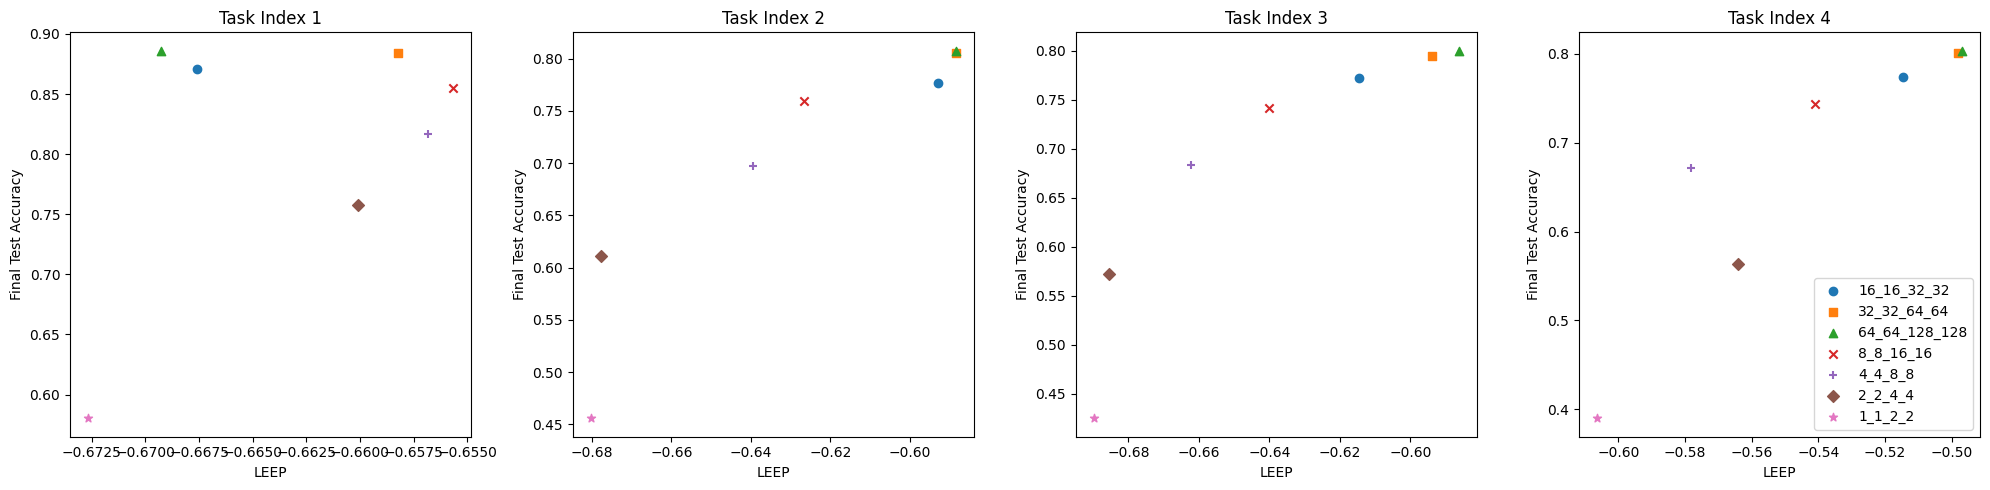

In [61]:
# Loop over each run # Define different markers for each tuple
markers = ['o', 's', '^', 'x', '+', 'D', '*']  # Add more markers if you have more than 5 tuples

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Iterate over each task_idx
for task_idx in range(1, 5):
    ax = axes[task_idx - 1]
    ax.set_title(f'Task Index {task_idx}')
    ax.set_xlabel('LEEP')
    ax.set_ylabel('Final Test Accuracy')

    # Plot data for each tuple
    for i, (id, df) in enumerate(data):
        # Filter rows for the current task_idx
        task_data = df[df['task_idx'] == task_idx]
        # Plot only if there are data points
        if not task_data.empty:
            ax.scatter(task_data['leep'], task_data['final_test_acc'], marker=markers[i], label=id)

    # Add legend only to the last subplot
    if task_idx == 4:
        ax.legend()

plt.tight_layout()
plt.show()

In [64]:
data[0]

['16_16_32_32',
    task_idx  final_test_acc      leep logme   gbc
 0         0        0.968500       NaN  None  None
 1         1        0.870500 -0.667584  None  None
 2         2        0.776667 -0.593012  None  None
 3         3        0.772625 -0.614647  None  None
 4         4        0.773500 -0.514723  None  None]

In [65]:
data[1]

['32_32_64_64',
    task_idx  final_test_acc      leep logme   gbc
 0         0        0.976500       NaN  None  None
 1         1        0.883750 -0.658222  None  None
 2         2        0.805167 -0.588415  None  None
 3         3        0.794375 -0.593786  None  None
 4         4        0.800900 -0.498190  None  None]